In [33]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Add the parent directory to the Python path
parent_dir = os.path.abspath('../..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
# Import modules
import ddsp_textures.loss.functions
import ddsp_textures.auxiliar.filterbanks

# Import extra packages
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# Load audio to filter -----------------------------------
fire_path  = ".."+"/sounds/fire_sounds/fire.wav"
water_path = ".."+"/sounds/water_sounds/water.wav"
sr     = 44100
new_sr = sr // 4 # for log_bank
fire_audio, _  = librosa.load(fire_path, sr=sr)
water_audio, _ = librosa.load(water_path, sr=sr)
# Make list of segments for fire and water --------------
frame_size     = 2**16
new_frame_size = frame_size // 4
hop_size   = 2**16
fire_segments = []
water_segments = []
for i in range(0, len(fire_audio)-frame_size, hop_size):
    fire_segments.append(fire_audio[i:i+frame_size])
for i in range(0, len(water_audio)-frame_size, hop_size):
    water_segments.append(water_audio[i:i+frame_size])
# Initialize erb_bank and log_bank for statistics loss --
N_filter_bank = 20
M_filter_bank = 10
erb_bank    = ddsp_textures.auxiliar.filterbanks.EqualRectangularBandwidth(frame_size, sr, N_filter_bank, 20, sr // 2)
log_bank    = ddsp_textures.auxiliar.filterbanks.Logarithmic(new_frame_size,       new_sr, M_filter_bank, 10, new_sr // 4)
import torchaudio
downsampler = torchaudio.transforms.Resample(sr, new_sr)

In [35]:
#Testing Statistics functions --------------------------------------------------

fire_segment  = fire_segments[np.random.randint(len(fire_segments))]
water_segment = water_segments[np.random.randint(len(water_segments))]
fire_segment  = torch.tensor(fire_segment)
water_segment = torch.tensor(water_segment)
fire_stats  = ddsp_textures.loss.functions.statistics(fire_segment,  N_filter_bank, M_filter_bank, erb_bank, log_bank, downsampler)
water_stats = ddsp_textures.loss.functions.statistics(water_segment, N_filter_bank, M_filter_bank, erb_bank, log_bank, downsampler)
print("Fire statistics:\n")
print("stats_1:\n", fire_stats[0])
print("stats_2:\n", fire_stats[1])
print("stats_3:\n", fire_stats[2])
print("stats_4:\n", fire_stats[3])
print("stats_5:\n", fire_stats[4])
print("Water statistics:\n")
print("stats_1:\n", water_stats[0])
print("stats_2:\n", water_stats[1])
print("stats_3:\n", water_stats[2])
print("stats_4:\n", water_stats[3])
print("stats_5:\n", water_stats[4])

Fire statistics:

stats_1:
 tensor([[3.9451e+00, 4.1664e-01, 1.7560e-02, 6.7469e-03],
        [3.1879e+00, 2.9056e-01, 1.1731e-02, 6.2002e-03],
        [1.4499e+00, 3.3149e-01, 1.8657e-02, 8.2393e-03],
        [9.6674e-01, 4.0337e-01, 2.1575e-02, 9.4420e-03],
        [4.7016e-01, 6.4968e-01, 7.4221e-02, 6.7464e-02],
        [4.7276e-01, 6.5678e-01, 8.3115e-02, 8.0506e-02],
        [2.5598e-01, 1.2038e+00, 1.3207e-01, 1.3885e-01],
        [2.4522e-01, 1.1796e+00, 1.3974e-01, 1.7287e-01],
        [1.4800e-01, 3.6749e+00, 2.4319e-01, 4.0014e-01],
        [1.2532e-01, 5.5219e+00, 2.6695e-01, 4.5662e-01],
        [9.1891e-02, 7.7137e+00, 2.7215e-01, 4.8247e-01],
        [1.0659e-01, 6.1461e+00, 3.2440e-01, 7.3310e-01],
        [8.5832e-02, 1.3898e+01, 3.2407e-01, 6.8992e-01],
        [2.3266e-01, 3.4702e+00, 3.0461e-01, 6.4235e-01],
        [1.6934e-01, 1.0908e+01, 3.3951e-01, 7.1924e-01],
        [4.2858e-01, 2.3512e+00, 2.9066e-01, 6.2738e-01],
        [2.6202e-01, 6.2442e+00, 3.5944e-01,

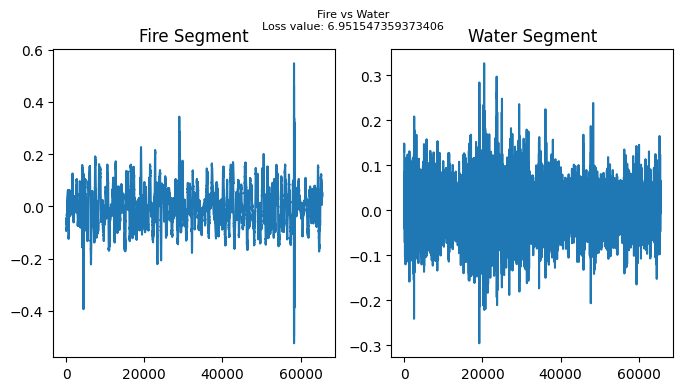

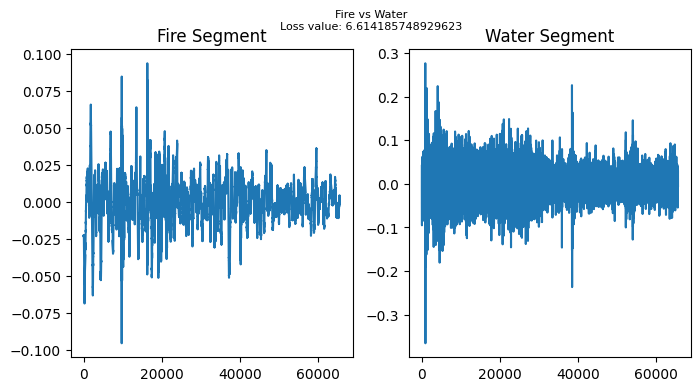

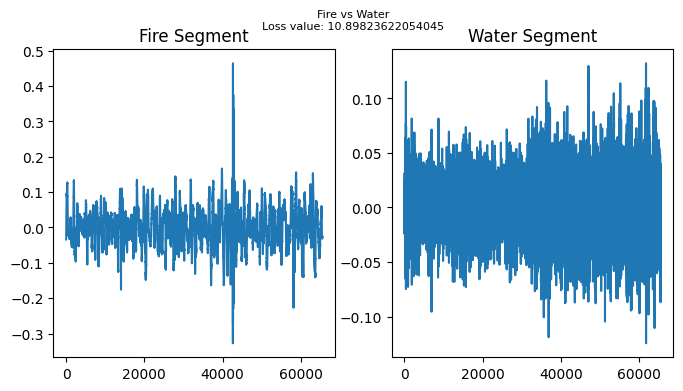

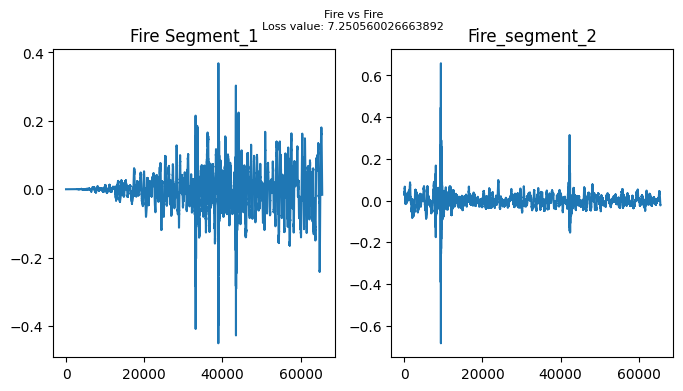

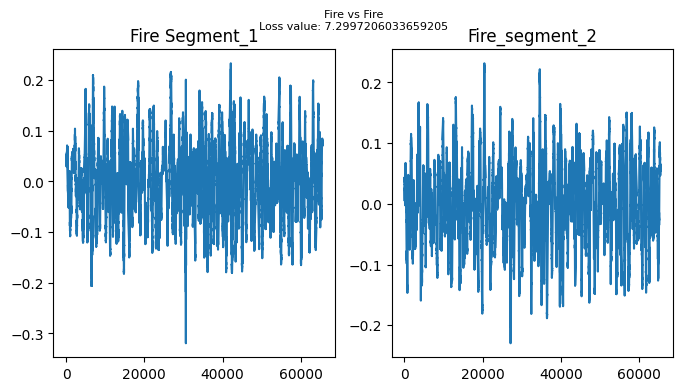

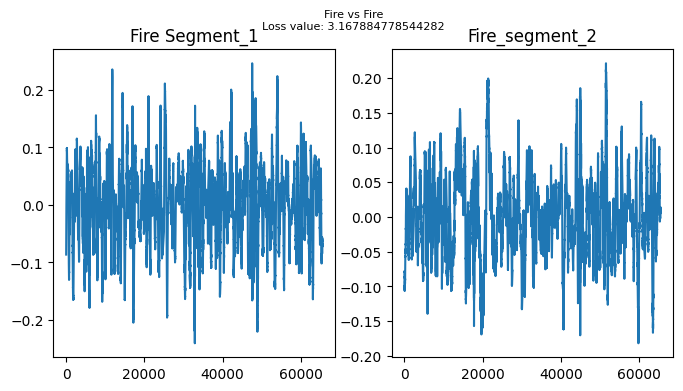

In [36]:
# Test Statistics loss function on three random pair of segments and plot them
for i in range(3):
    fire_segment  = fire_segments[np.random.randint(len(fire_segments))]
    water_segment = water_segments[np.random.randint(len(water_segments))]
    fire_segment  = torch.tensor(fire_segment)
    #play water and fire segments
    display(Audio(fire_segment, rate=sr))
    display(Audio(water_segment, rate=sr))
    water_segment = torch.tensor(water_segment)
    loss_value = ddsp_textures.loss.functions.statistics_loss(fire_segment, water_segment, N_filter_bank, M_filter_bank, erb_bank, log_bank, downsampler)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.plot(fire_segment)
    ax1.set_title('Fire Segment')
    ax2.plot(water_segment)
    ax2.set_title('Water Segment')
    fig.suptitle(f'Fire vs Water\nLoss value: {loss_value}', fontsize=8)
    plt.show()
# Test Statistics loss function on three random pair of fair
for i in range(3):
    fire_segment_1 = fire_segments[np.random.randint(len(fire_segments))]
    fire_segment_2 = fire_segments[np.random.randint(len(fire_segments))]
    fire_segment_1 = torch.tensor(fire_segment_1)
    fire_segment_2 = torch.tensor(fire_segment_2)
    #play water and fire segments
    display(Audio(fire_segment_1, rate=sr))
    display(Audio(fire_segment_2, rate=sr))
    loss_value = ddsp_textures.loss.functions.statistics_loss(fire_segment_1, fire_segment_2, N_filter_bank, M_filter_bank, erb_bank, log_bank, downsampler)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.plot(fire_segment_1)
    ax1.set_title('Fire Segment_1')
    ax2.plot(fire_segment_2)
    ax2.set_title('Fire_segment_2')
    fig.suptitle(f'Fire vs Fire\nLoss value: {loss_value}', fontsize=8)
    plt.show()

In [37]:
#Take 16 segments and make a batch
fire_batch = []
for i in range(32):
    fire_segment = fire_segments[np.random.randint(len(fire_segments))]
    fire_segment = torch.tensor(fire_segment)
    fire_batch.append(fire_segment)
fire_batch = torch.stack(fire_batch, dim=0)

water_batch = []
for i in range(32):
    water_segment = water_segments[np.random.randint(len(water_segments))]
    water_segment = torch.tensor(water_segment)
    water_batch.append(water_segment)
water_batch = torch.stack(water_batch, dim=0)

import time
start = time.time()
loss = ddsp_textures.loss.functions.batch_statistics_loss(fire_batch, water_batch, N_filter_bank, M_filter_bank, erb_bank, log_bank, downsampler)
end = time.time()
print("Time taken: ", end-start)
print("Batch loss value: ", loss)


Time taken:  19.730008840560913
Batch loss value:  tensor(8.9886, dtype=torch.float64)


In [38]:
# Load audio to filter -----------------------------------
fire_path  = ".."+"/sounds/fire_sounds/fire.wav"
water_path = ".."+"/sounds/water_sounds/water.wav"
sr     = 44100
new_sr = sr // 4 # for log_bank
fire_audio, _  = librosa.load(fire_path, sr=sr)
water_audio, _ = librosa.load(water_path, sr=sr)
# Make list of segments for fire and water --------------
frame_size     = 2**16
new_frame_size = frame_size // 4
hop_size   = 2**16
fire_segments = []
water_segments = []
for i in range(0, len(fire_audio)-frame_size, hop_size):
    fire_segments.append(fire_audio[i:i+frame_size])
for i in range(0, len(water_audio)-frame_size, hop_size):
    water_segments.append(water_audio[i:i+frame_size])
# Initialize erb_bank and log_bank for statistics loss --
N_filter_bank = 20
M_filter_bank = 10
erb_bank    = ddsp_textures.auxiliar.filterbanks.EqualRectangularBandwidth(frame_size, sr, N_filter_bank, 20, sr // 2)
log_bank    = ddsp_textures.auxiliar.filterbanks.Logarithmic(new_frame_size,       new_sr, M_filter_bank, 10, new_sr // 4)
import torchaudio

import ddsp_textures.loss
downsampler = torchaudio.transforms.Resample(sr, new_sr)

# pick random segments
fire_segment  = fire_segments[np.random.randint(len(fire_segments))]
water_segment = water_segments[np.random.randint(len(water_segments))]
fire_segment  = torch.tensor(fire_segment)
water_segment = torch.tensor(water_segment)
#play water and fire segments
display(Audio(fire_segment, rate=sr))
display(Audio(water_segment, rate=sr))
# Compute stems
from ddsp_textures.auxiliar.features import *
stems_fire  = features_envelopes_stems(fire_segment, _, erb_bank)
stems_water = features_envelopes_stems(water_segment, _, erb_bank)
# Compute loss
loss_value = ddsp_textures.loss.functions.statistics_loss_stems(stems_fire, stems_water, N_filter_bank, M_filter_bank, log_bank, downsampler)


In [ ]:
#Take 32 segments and make a batch
fire_batch = []
for i in range(32):
    fire_segment = fire_segments[np.random.randint(len(fire_segments))]
    fire_segment = torch.tensor(fire_segment)
    fire_segment_stems = features_envelopes_stems(fire_segment, _, erb_bank)
    fire_batch.append(fire_segment_stems)
fire_batch = torch.stack(fire_batch, dim=0)

water_batch = []
for i in range(32):
    water_segment = water_segments[np.random.randint(len(water_segments))]
    water_segment = torch.tensor(water_segment)
    water_segment_stems = features_envelopes_stems(water_segment, _, erb_bank)
    water_batch.append(water_segment_stems)
water_batch = torch.stack(water_batch, dim=0)

# compute the loss and tell me how much time it took
import time
start = time.time()
loss = ddsp_textures.loss.functions.batch_statistics_loss_stems(fire_batch, water_batch, N_filter_bank, M_filter_bank, log_bank, downsampler)
end = time.time()
print("Time elapsed: ", end-start)
print("Batch loss value: ", loss)

Time elapsed:  17.48439908027649
Batch loss value:  tensor(9.0640, dtype=torch.float64)
